 ![문제](quiz2.png)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## 조현웅쌤 코드
from itertools import product

p = [0,1,2,3,4]
p2 = list(product(p,p))

def prod_list(A,B):
    """A에 B의 원소를 하나씩 추가한 리스트를 반환하는 함수"""
    C,D = [],[]
    for i in A:
        C.append(i)
        D.append(i)
    A = []
    for i in B:
        C.append(i)
        A.append(C)
        C = []
        for i in D:
            C.append(i)
    return A

def S_shoose(C):
    """경로 C의 마지막 점에서 거리 1만큼 떨어진 점들중 경로 C에 없는 점을 추가한 경로를 반환하는 함수"""
    final_C = C[-1]
    mysc = []
    for (m,n) in p2:
        if ((final_C[0]-m)**2 + (final_C[1]-n)**2) == 1:
            mysc.append((m,n))
    for (i,j) in C:
        if (i,j) in mysc:
            mysc.remove((i,j))
    result = prod_list(C, mysc)
    return result

def F_shoose(C):
    """경로 C의 마지막 점에서 거리 sqrt(5)만큼 떨어진 점들중 경로 C에 없는 점을 추가한 경로를 반환하는 함수"""
    final_C = C[-1]
    myfc = []
    for (m,n) in p2:
        if ((final_C[0]-m)**2 + (final_C[1]-n)**2) == 5:
            myfc.append((m,n))
    for (i,j) in C:
        if (i,j) in myfc:
            myfc.remove((i,j))
    result = prod_list(C,myfc)
    return result

#본 코드
Shoose = ['fsssss','ffssss','ssssff','sssssf','ffffff'] # 갈아신는 신발종류
total_path = []
desired_path = []
my_path = [[(0, 0)]]
sol1 = []
for my_shoose in Shoose:
    count = 2
    for fs in my_shoose:
        if fs == 'f':
            for k in my_path:
                result = F_shoose(k)
                for path in result:
                    total_path.append(path)
        if fs == 's':
            for k in my_path:
                result = S_shoose(k)
                for path in result:
                    total_path.append(path)
        my_path = []
        for i in total_path:
            if len(i) == count:
                my_path.append(i)
        count += 1
    for i in my_path:
        if i[-1] == (4,4):
            desired_path.append(i)
    my_path = [[(0, 0)]]
    total_path = []
    if my_shoose == 'ffssss': # S신발로 도착하는 경우의 수를 구함
        sol1 = desired_path[:]
print(f"6걸음만에 B지점에 도달했을때 신고있는 신발이 S신발인 경우의 수는 {len(sol1)}가지 입니다.")
print(f"6걸음만에 B지점에 도달하는 모든 경우의 수는 {len(desired_path)}가지 입니다.")


6걸음만에 B지점에 도달했을때 신고있는 신발이 S신발인 경우의 수는 40가지 입니다.
6걸음만에 B지점에 도달하는 모든 경우의 수는 112가지 입니다.


In [6]:
def mydistance(a,b):
    disc = abs(a[0]-b[0])+abs(a[1]-b[1])
    if disc==1:
        return "green"
    else:
        return "yellow"

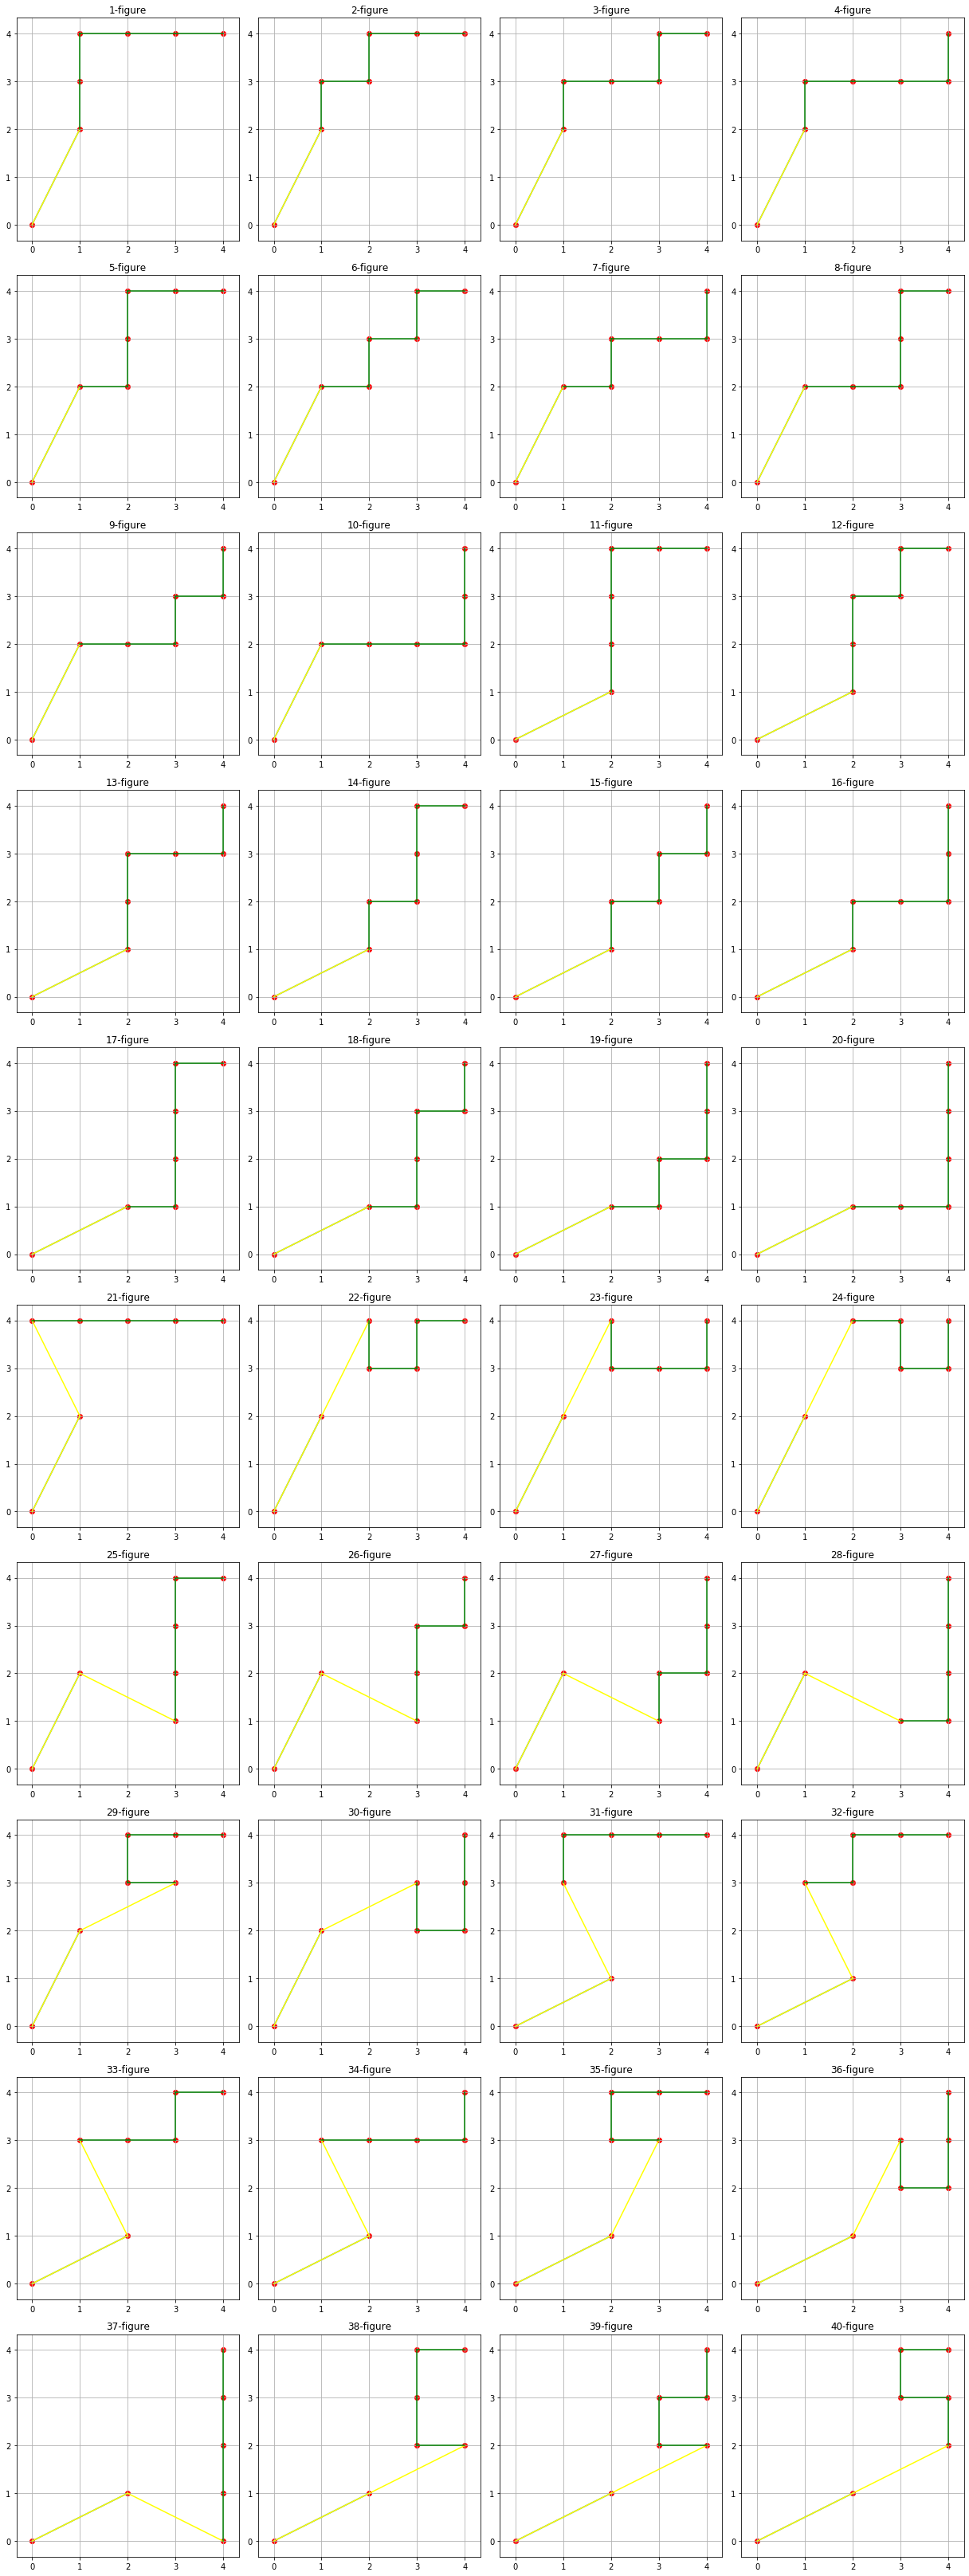

In [7]:
fig = plt.figure(figsize=(17,45 ))
for k in range(0,40):
    sol_graph = sol1[k]
    sol1_x = [i[0] for i in sol_graph]
    sol1_y = [i[1] for i in sol_graph]

    ax = fig.add_subplot(10,4,k+1)
    major_ticks = np.arange(0, 9, 1)
   
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid()
    ax.scatter(sol1_x, sol1_y,c='r')
    plt.plot(sol1_x[0:2],sol1_y[0:2])
    plt.title(f"{k+1}-figure")
    for j,i in enumerate(sol_graph):
        try:
            mycolor=mydistance(i,sol_graph[j+1])
            myx=[i[0],sol_graph[j+1][0]]
            myy=[i[1],sol_graph[j+1][1]]
            plt.plot(myx,myy,color=mycolor)
        except IndexError:
            pass
fig.tight_layout() 
# plt.savefig('test2.png')
plt.show()